__The main intent of this Notebook is to understand how to find the Pearson coefficient using pandas and visualize it using heatmap, scatter plot, pair plot and identify the prominent features which can be used further for model building__

Data Set : https://archive.ics.uci.edu/ml/datasets/auto+mpg

# Source:

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


# Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


# Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



# More on DataSet

As mentioned above the dataset contains the 9 attributes/features. The mpg is the depedent/target variable which needs to be predicted and the others are the independent variables.

To predict the target/dependent variable the model will be using the other independent variables. The Correlation explains how each of the independent variable is related to the target variables and helps in understanding whether that independent variable should be considered or not.


# Correlation 

There are few ways to find the correlation between the independent and dependent variables. Following are the ways to understand the correlation

1. Pearson correlation using pandas
2. Seaborn Heatmap
3. Seaborn scatter plot / lmplot

In [6]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
auto_mpg_df = pd.read_csv("auto-mpg.csv")

In [4]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
auto_mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


auto_mpg_df.corr() finds the correlation each variable with all the other variables in the dataframe. In the following step we are storing the correlation values to the variable corr_matrix. Since in our dataframe mpg is the target variable and we are more interested to know how other variables are correlated to this, we are just displaying the correlation values with respect to mpg using corr_matrix['mpg']

In [21]:
# method = pearson is by default and can be avoided to mention
corr_matrix = auto_mpg_df.corr(method='pearson')
corr_matrix

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [22]:
corr_matrix['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

From the above correlation marix it can be observered that weight, acceleration & cylinders have strong negative relation with mpg where as model year, origin has not so strong positive relation with mgg and acceleration has lower positive relation with mpg. This relation can also be visualized using the heat map as shown below stronger the relation darker the color

In [ ]:
sns.scatterplot(data=auto_mpg_df, x='mpg', y = 'weight')

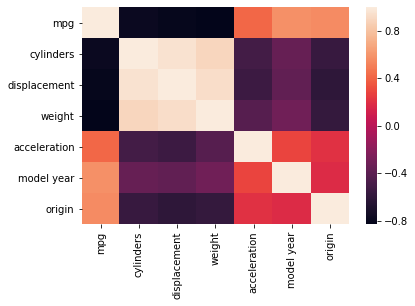

In [11]:
sns.heatmap(auto_mpg_df.corr())

As discussed, in the previous notebooks the correlation can also be visualized using the scatter plots. Following are the scatter plots which can be related to our discussion in the previous notebooks. lmplot in addition to scatter plot shows the regression line as well

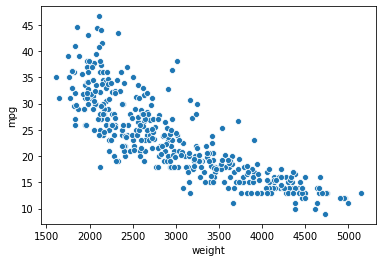

In [37]:
sns.scatterplot(data=auto_mpg_df, y='mpg', x= 'weight');


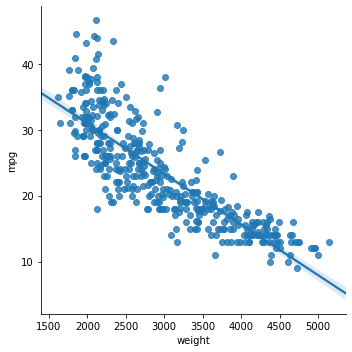

In [29]:
sns.lmplot(data=auto_mpg_df, y='mpg', x = 'weight');

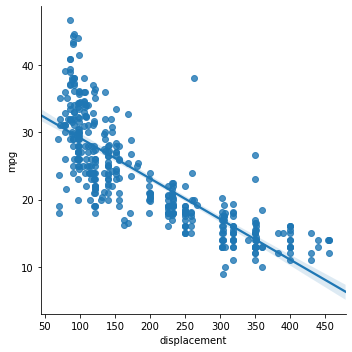

In [38]:
sns.lmplot(data=auto_mpg_df, y='mpg', x = 'displacement');

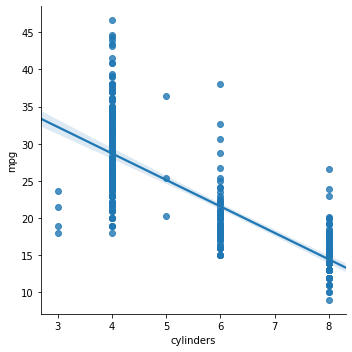

In [39]:
sns.lmplot(data=auto_mpg_df, y='mpg', x = 'cylinders');

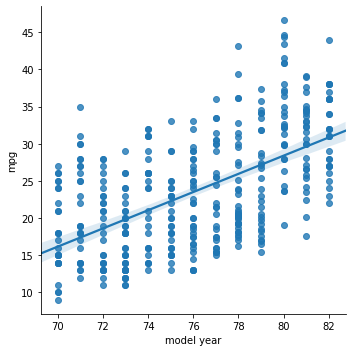

In [40]:
sns.lmplot(data=auto_mpg_df, y='mpg', x = 'model year');

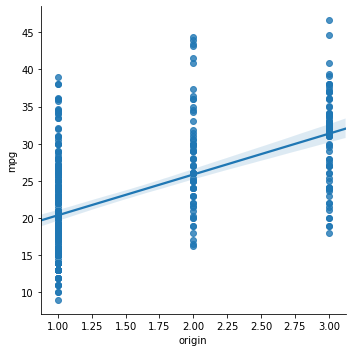

In [41]:
sns.lmplot(data=auto_mpg_df, y='mpg', x = 'origin');

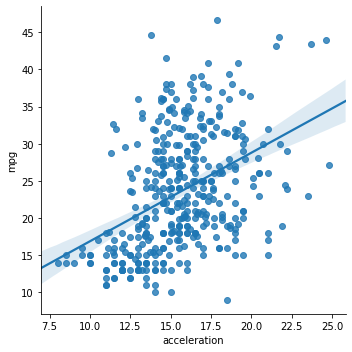

In [42]:
sns.lmplot(data=auto_mpg_df, y='mpg', x = 'acceleration');

Seaborn pairplot can be used to plot the relationship across the variables as shown in the figure. The diagonal panels in the following plot represent the distribution of that particular feature

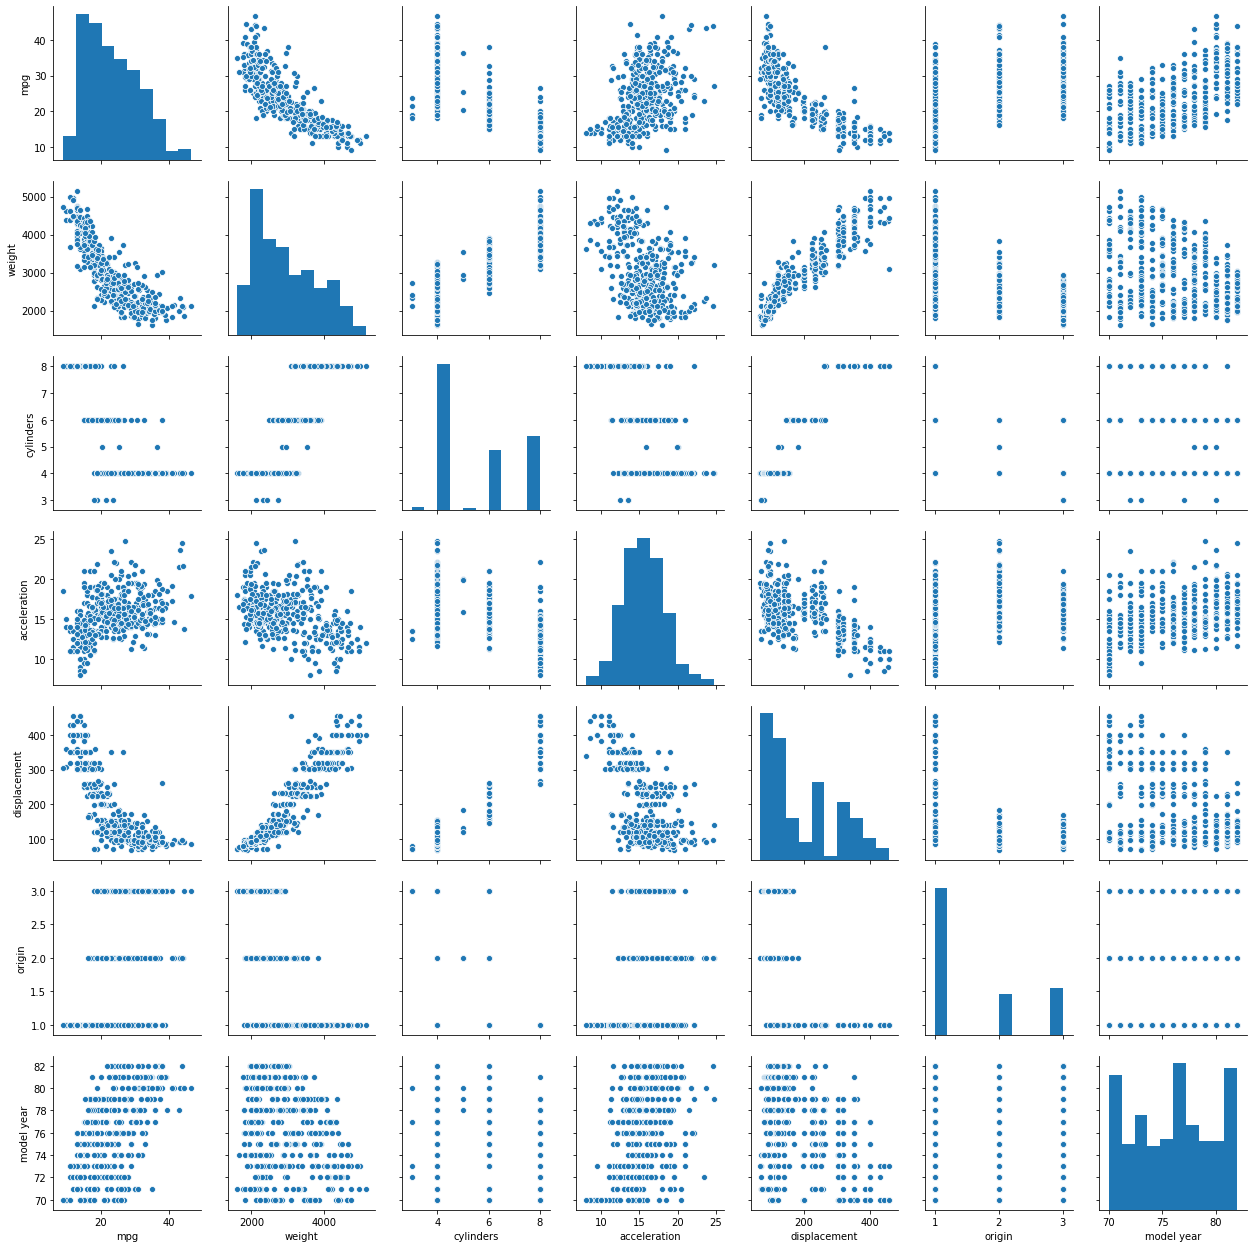

In [44]:
sns.pairplot(auto_mpg_df, vars=['mpg','weight','cylinders','acceleration','displacement','origin','model year'])

# Conclusion

It is clearly observed that the variables having positive relation (a), negative relationb()  and no relation(c) follows the below pattern

<img src='corrs.png' />